In [2]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
from numpy import cos, sin
%matplotlib inline

from nsmod.manual_switching_torque_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

In [4]:
def SignalModel_01(theta, t):
    phiddot, phidddot, psidot, psi0, theta, chi = theta
    #psidot = -epsilon * phidot
    psi = psidot * t + psi0
    Sin2Theta = np.abs(1 - (sin(theta) * sin(psi) * sin(chi) + cos(theta) + cos(chi))**2)
    return phiddot + phidddot*t + (
              psidot**2*(2*(sin(chi)*cos(theta) - sin(theta)*sin(psidot*t + psi0)*cos(chi))
                      *(sin(chi)*sin(theta)*sin(psidot*t + psi0) + cos(chi)*cos(theta))*sin(chi)
                      - ((sin(chi)*sin(psidot*t + psi0)*cos(theta) - sin(theta)*cos(chi))**2
                      + sin(chi)**2*cos(psidot*t + psi0)**2)*cos(chi))*sin(chi)*sin(theta)
                      *cos(psidot*t + psi0)/((sin(chi)*sin(psidot*t + psi0)*cos(theta)
                    - sin(theta)*cos(chi))**2 
                      + sin(chi)**2*cos(psidot*t + psi0)**2)**2
                        ) / (2*np.pi)  

def SignalModel_Em(theta, t):
    phidot, phiddot, psidot, psi0, theta, chi, Bo = theta

    psi = psidot * t + psi0
    Sin2Theta = 1 - (sin(theta)*sin(psi)*sin(chi) + cos(theta)*cos(chi))**2
    phidot_t = phidot + phiddot*t #+ .5*phidddot*t**2
    Phidot = phidot_t + psidot * sin(chi) * (cos(theta) *sin(chi) - sin(psi) * sin(theta) * cos(chi)) / (
                        (sin(theta)*cos(chi) - cos(theta)*sin(psi)*sin(chi))**2 + (cos(psi) * sin(chi))**2)
    
    # Standard values for c , R in cgs
    c = 3e10
    R = 1e6
    I0 = 1e45
    k = R**6 * Bo**2 / (6 * c**3 * I0) 
    return -k * Phidot**3 * Sin2Theta / (2*np.pi)

## Low EM amplification

BETA FUNCTION IS USED
BETA FUNCTION IS USED
[  6.28318531e+02  -4.37720848e-07  -1.88495559e-02   1.57079633e+00
   3.49065850e-02   1.54636172e+00   4.24264069e+13]


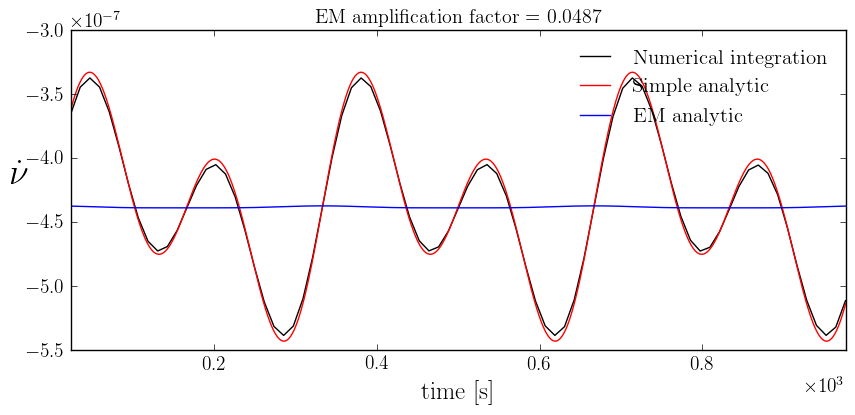

In [6]:
fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameters
epsI3 = 3e-5
omega0 = 2*np.pi*100
epsA = 5e-10
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 3 * tauP
a0 = 2.0

n = 50000
error = 1e-13

# Exact numerical result
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 AnomTorque=True)


ax1 = Plot.SpindownRate(file_name, ax=ax1, analytic="", divisor=7, label="Numerical integration")

time = np.linspace(0, T, 1000)

PD = File_Functions.Parameter_Dictionary(file_name)
nu_dot0 = PD['nu_dot0']

# Simple analytic
theta_01 = np.array([ nu_dot0, 0.0, -epsI3*omega0, 0.5*np.pi,  np.radians(a0), np.radians(chi0)])
ax1.plot(time, SignalModel_01(theta_01, time), "-", color='r', label="Simple analytic")

# EM model
theta_Em = np.array([omega0, nu_dot0, -epsI3*omega0, 0.5*np.pi, np.radians(a0), 
                    np.radians(chi0), float(PD['Bs'])])

print theta_Em
ax1.plot(time, SignalModel_Em(theta_Em, time), color="b", label="EM analytic")

ax1.legend(frameon=False, loc=1)

ax1.set_title("EM amplification factor = {:2.4f}".format(PD['EMtorqueAmplificationfactor']))
plt.show()

## High EM amplification

BETA FUNCTION IS USED
BETA FUNCTION IS USED


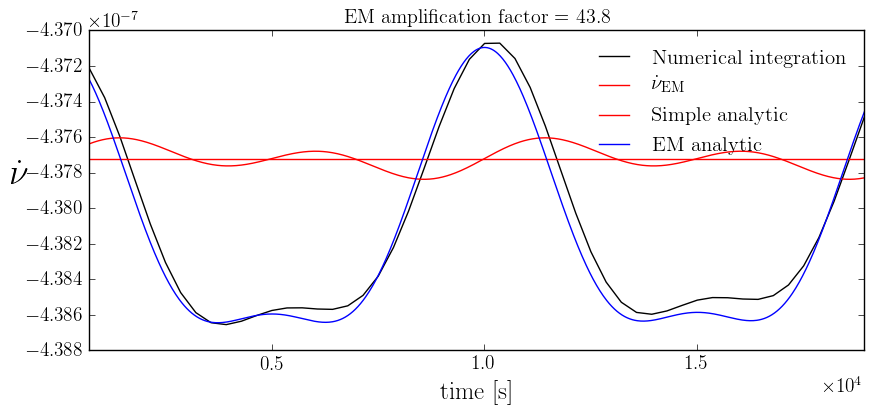

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameters
epsI3 = 1e-6
omega0 = 2*np.pi*100
epsA = 5e-10
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 2 * tauP
a0 = 2.0

n = 50000
error = 1e-13

# Exact numerical result
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 AnomTorque=True)


ax1 = Plot.SpindownRate(file_name, ax=ax1, analytic="EM", divisor=7, label="Numerical integration")

time = np.linspace(0, T, 1000)

PD = File_Functions.Parameter_Dictionary(file_name)
nu_dot0 = PD['nu_dot0']

# Simple analytic
theta_01 = np.array([ nu_dot0, 0.0, -epsI3*omega0, 0.5*np.pi,  np.radians(a0), np.radians(chi0)])
ax1.plot(time, SignalModel_01(theta_01, time), "-", color='r', label="Simple analytic")

# EM model
theta_Em = np.array([omega0, nu_dot0, -epsI3*omega0, 0.5*np.pi, np.radians(a0), 
                    np.radians(chi0), float(PD['Bs'])])
ax1.plot(time, SignalModel_Em(theta_Em, time), color="b", label="EM analytic")

ax1.legend(frameon=False, loc=1)
ax1.set_title("EM amplification factor = {:2.1f}".format(PD['EMtorqueAmplificationfactor']))
plt.show()